<a href="https://colab.research.google.com/github/Abishek46/CNN-model-to-detect-COVID-19/blob/main/CNN_model_to_detect_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN model to detect COVID-19

Importing libraries

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Setting the paths of the dataset and images to be classified

In [3]:

dataset_path = '/content/drive/MyDrive/abishek/covid19/covid19/train'
test_dir = '/content/drive/MyDrive/abishek/covid19/covid19/test'

In [4]:
img_size = 128
num_classes = len(os.listdir(dataset_path))
batch_size = 32

Creating the image and the labels

In [5]:
from sklearn.preprocessing import LabelBinarizer

def load_dataset():
    images = []
    lbls = []
    labels = []
    classes = os.listdir(dataset_path)
    label_binarizer = LabelBinarizer()
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):  # Check if the current item is a directory
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                try:
                    image = cv2.imread(image_path)
                    if image is not None:  # Check if the image was loaded successfully
                        image = cv2.resize(image, (img_size, img_size))
                        images.append(image)
                        lbls.append(class_name)
                    else:
                        print(f"Skipping invalid image: {image_path}")
                except Exception as e:
                    print(f"Error loading image: {image_path}")
                    print(str(e))
    # Convert labels to unique binary arrays
    labels = label_binarizer.fit_transform(lbls)
    return images, lbls, labels

In [6]:
images, lbls, labels = load_dataset()

In [7]:
# Create a set to keep track of unique labels
printed_labels = set()
# Create a counter to keep track fo the label count
no_of_labels = 0
# Print lbls and corresponding labels
for labelName, arr in zip(lbls, labels):
    # Check if the label has already been printed
    if labelName not in printed_labels:
        # Print the disease and array
        print("Label:", labelName, ", Array:", arr)
        # Add the disease to the set of printed diseases
        printed_labels.add(labelName)
        # Increment the disease counter
        no_of_labels = no_of_labels + 1

print()
print("No. of labels:", no_of_labels)

Label: Viral Pneumonia , Array: [0 0 1]
Label: Covid , Array: [1 0 0]
Label: Normal , Array: [0 1 0]

No. of labels: 3


Preprocessing the dataset

In [8]:
def preprocess_dataset(images, labels):
    images = np.array(images)
    images = images.astype('float32') / 255.0
    labels = np.array(labels)
    return images, labels

In [9]:
images, labels = preprocess_dataset(images, labels)

In [10]:
print(labels)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 

Creating the Convolutional Neural Network (CNN)
Splitting the data into a training and testing set

In [11]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

Creating the CNN model

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


Compiling the CNN model

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Augmenting the training data

In [14]:
data_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator.fit(train_images)

Training the model with the training data

In [15]:
history = model.fit(data_generator.flow(train_images, train_labels, batch_size=batch_size), steps_per_epoch=len(train_images) // batch_size, epochs=35)


Epoch 1/35
6/6 [==============================] - 12s 105ms/step - loss: 1.3234 - accuracy: 0.3214
Epoch 2/35
6/6 [==============================] - 1s 185ms/step - loss: 1.0851 - accuracy: 0.4524
Epoch 3/35
6/6 [==============================] - 1s 101ms/step - loss: 1.0284 - accuracy: 0.5417
Epoch 4/35
6/6 [==============================] - 1s 125ms/step - loss: 0.8688 - accuracy: 0.6354
Epoch 5/35
6/6 [==============================] - 1s 100ms/step - loss: 0.7305 - accuracy: 0.6905
Epoch 6/35
6/6 [==============================] - 1s 97ms/step - loss: 0.5248 - accuracy: 0.7798
Epoch 7/35
6/6 [==============================] - 1s 97ms/step - loss: 0.4315 - accuracy: 0.8631
Epoch 8/35
6/6 [==============================] - 1s 97ms/step - loss: 0.4443 - accuracy: 0.8095
Epoch 9/35
6/6 [==============================] - 1s 100ms/step - loss: 0.8264 - accuracy: 0.7202
Epoch 10/35
6/6 [==============================] - 1s 115ms/step - loss: 0.5944 - accuracy: 0.7321
Epoch 11/35
6/6 [====

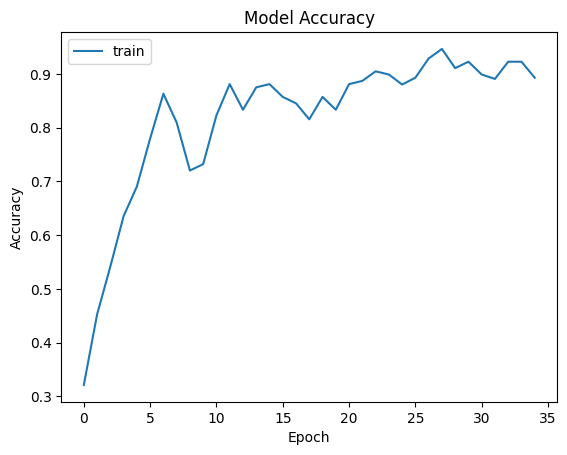

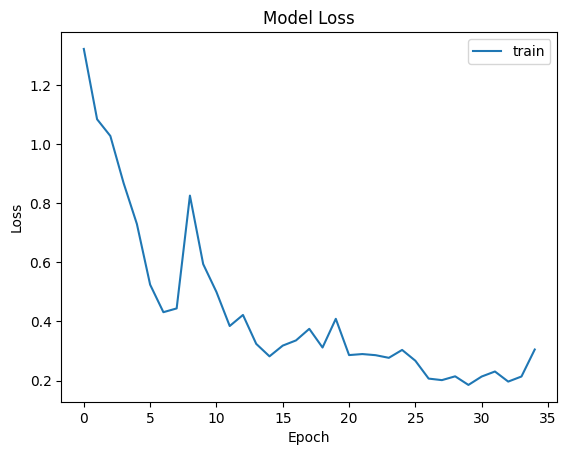

In [16]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2/2 [==============================] - 0s 189ms/step - loss: 0.3879 - accuracy: 0.9020
Test Loss: 0.387937068939209
Test Accuracy: 0.9019607901573181


In [18]:
images_to_be_classified = os.listdir(test_dir)
resized_images = []

In [19]:
for image_name in images_to_be_classified:
    # Construct the full path to the image
    image_path = os.path.join(test_dir, image_name)
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Resize the image
    resized_image = cv2.resize(image, (img_size, img_size))
    # Append the resized image to the list
    resized_images.append(resized_image)

In [20]:
resized_images = np.array(resized_images)

In [21]:
resized_images = resized_images / 255.0

In [27]:
predictions = model.predict(resized_images)

2/2 [==============================] - 1s 201ms/step


In [22]:
printed_labels = list(printed_labels)
printed_labels.sort()
print(printed_labels)

['Covid', 'Normal', 'Viral Pneumonia']


Printing image names along with their corresponding labels

In [28]:
for i in range(len(images_to_be_classified)):
    image_name = images_to_be_classified[i]
    prediction = predictions[i]
    pred_label = ""
    rounded_prediction = np.round(prediction)
    for i in range(len(rounded_prediction)):
        if rounded_prediction[i] == 1:
            labelName = printed_labels[i]
    print("Image:", image_name, "Prediction:", labelName)

Image: covid (4).jpeg Prediction: Covid
Image: normal (8).jpeg Prediction: Normal
Image: covid (2).png Prediction: Covid
Image: vPneumonia (12).jpeg Prediction: Viral Pneumonia
Image: covid (5).jpg Prediction: Covid
Image: normal (6).jpeg Prediction: Normal
Image: vPneumonia (14).jpeg Prediction: Viral Pneumonia
Image: normal (3).jpeg Prediction: Normal
Image: covid (11).jpeg Prediction: Covid
Image: vPneumonia (13).jpeg Prediction: Viral Pneumonia
Image: covid (2).jpeg Prediction: Covid
Image: vPneumonia (8).jpeg Prediction: Viral Pneumonia
Image: normal (11) (1).jpeg Prediction: Viral Pneumonia
Image: normal (11).jpeg Prediction: Viral Pneumonia
Image: normal (13) (1).jpeg Prediction: Viral Pneumonia
Image: normal (2).jpeg Prediction: Normal
Image: normal (5).jpeg Prediction: Viral Pneumonia
Image: vPneumonia (18).jpeg Prediction: Viral Pneumonia
Image: covid (5).jpeg Prediction: Covid
Image: normal (9).jpeg Prediction: Viral Pneumonia
Image: covid (7).jpeg Prediction: Covid
Image: c

In [29]:
model.save('covid19model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
